In [1]:
pip install palmerpenguins

In [2]:
!pip install graphviz

In [3]:
!pip install -U scikit-learn

In [4]:
import pandas as pd
import seaborn as sns 
from palmerpenguins import load_penguins
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
from sklearn.tree import export_graphviz # tree 시각화를 위해
# export_graphviz : 의사결정나무에 대한 graphviz dot data 생성하는 함수
import graphviz # tree 시각화
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증

import warnings
warnings.filterwarnings('ignore')

In [5]:
penguins = load_penguins()
#penguins.replace('', np.nan, inplace=True)
penguins = penguins.dropna()
penguins['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [6]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [7]:
seed = 5764

# 학습, 테스트 데이터 분리 (0.7:0.3)
x_train, x_test, y_train, y_test = train_test_split(penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']], penguins['species'], test_size=0.7, random_state = 5674)

In [8]:
dt_clf = DecisionTreeClassifier(random_state=5674)
dt_clf.fit(x_train, y_train) # 학습

DecisionTreeClassifier(random_state=5674)

In [9]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=['Adelie', 'Gentoo', 'Chinstrap'], feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], impurity=True, filled=True)

[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]


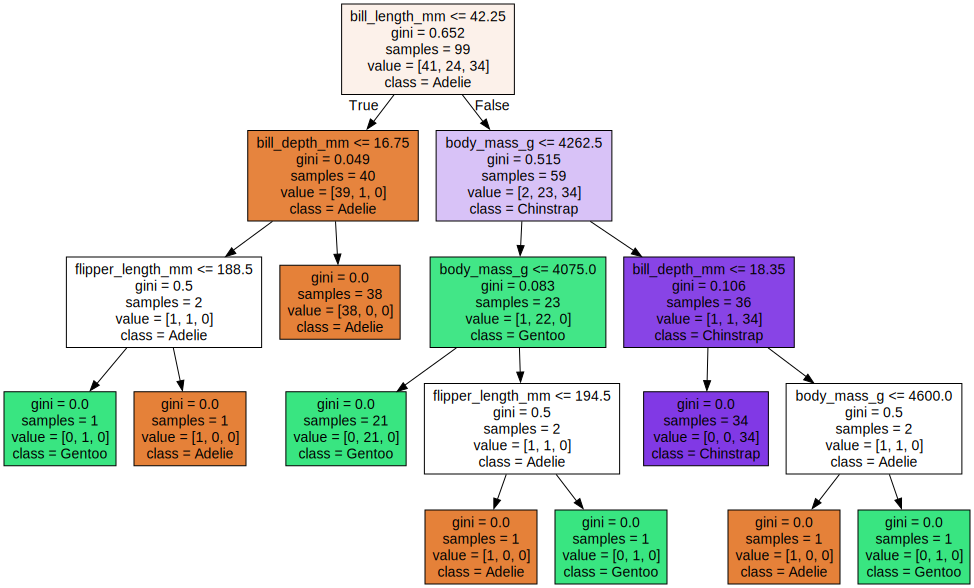

In [10]:
print('[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
dec = graphviz.Source(dot_graph, format='png')
dec.view()
dec

In [11]:
average_val = 'macro'

In [12]:
y_pred = dt_clf.predict(x_test)

In [13]:
# 학습결과 평가
print("Train_Accuracy : ", dt_clf.score(x_train, y_train), '\n')
print("Test_Accuracy : ", dt_clf.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred, average = average_val)
precision = mt.precision_score(y_test, y_pred, average = average_val)
f1_score = mt.f1_score(y_test, y_pred, average = average_val)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  1.0 

Test_Accuracy :  0.8803418803418803 

Accuracy:  0.88 

Recall:  0.88 

Precision:  0.86 

F1_score:  0.86 

Confusion Matrix: 
 [[90 14  1]
 [ 5 38  1]
 [ 3  4 78]]


In [14]:
# 교차검증

x = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins['species']

# 각 폴드의 스코어 
scores = cross_val_score(dt_clf, x, y, cv = 5)

print('Averaged results of cross validation: ', scores.mean())

Averaged results of cross validation:  0.9639981908638624


In [15]:
pd.DataFrame(cross_validate(dt_clf, x, y, cv =5))

,fit_time,score_time,test_score
0,0.007424,0.001014,0.970149
1,0.008016,0.000000,1.000000
2,0.008435,0.005082,0.910448
3,0.003937,0.008531,0.984848
4,0.000000,0.007020,0.954545


In [16]:
# test set에 대한 스코어(정확도)
dt_clf.score(x_test, y_test)

0.8803418803418803

In [17]:
pruned_dt_clf = DecisionTreeClassifier(max_depth=2, random_state=5674) # max_depth=3으로 제한
pruned_dt_clf .fit(x_train, y_train)

print("Accuracy of training set: {:.3f}".format(pruned_dt_clf.score(x_train, y_train)))
print("Accuracy of test set: {:.3f}".format(pruned_dt_clf.score(x_test, y_test)))

Accuracy of training set: 0.960
Accuracy of test set: 0.897


In [18]:
export_graphviz(pruned_dt_clf, out_file="prunedtree.dot", class_names=['Adelie', 'Gentoo', 'Chinstrap'], feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], impurity=True, filled=True)

[ max_depth가 2인 경우의 Decision Tree 시각화 ]


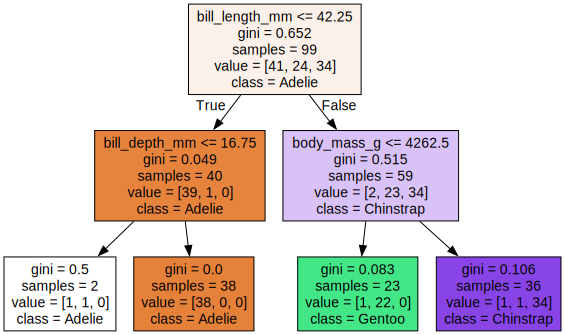

In [19]:
print('[ max_depth가 2인 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("prunedtree.dot") as f:
    dot_graph = f.read()
prunedres = graphviz.Source(dot_graph)
prunedres

In [20]:
# 학습결과 평가
print("Train_Accuracy : ", pruned_dt_clf.score(x_train, y_train), '\n')
print("Test_Accuracy : ", pruned_dt_clf.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred, average = average_val)
precision = mt.precision_score(y_test, y_pred, average = average_val)
f1_score = mt.f1_score(y_test, y_pred, average = average_val)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix) 

Train_Accuracy :  0.9595959595959596 

Test_Accuracy :  0.8974358974358975 

Accuracy:  0.88 

Recall:  0.88 

Precision:  0.86 

F1_score:  0.86 

Confusion Matrix: 
 [[90 14  1]
 [ 5 38  1]
 [ 3  4 78]]


In [21]:
# test set에 대한 스코어(정확도)
pruned_dt_clf.score(x_test, y_test)

0.8974358974358975